<a href="https://colab.research.google.com/github/TeddyAbraham/DelhiveryFeatureEngineering/blob/main/DelhiveryFeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox

In [ ]:
df = pd.read_csv("Delhivery.csv")
print("Shape:",df.shape)
df.head(3)

Shape: (144867, 24)


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:01,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714


In [ ]:
df[df['trip_uuid']== 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:01,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000
5,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 06:15,10.403038,15,11,12.1171,1.363636,15,11,12.1171,1.363636
6,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 05:47,18.045481,44,17,21.2890,2.588235,28,6,9.1719,4.666667
7,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 05:25,28.061896,65,29,35.8252,2.241379,21,11,14.5362,1.909091
8,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 05:15,38.939167,76,39,47.1900,1.948718,10,10,11.3648,1.000000
9,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 04:49,43.595802,102,45,53.2334,2.266667,26,6,6.0434,4.333333


In [ ]:
df.isna().sum()/len(df)*100

,0
data,0.000000
trip_creation_time,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.202254
destination_center,0.000000
destination_name,0.180165
od_start_time,0.000000


In [ ]:
# Since in this large dataset we have a small % of null values we choose to drop
df = df.dropna(how='any')
df = df.reset_index(drop=True)
# Since some of the columns have been mentioned as "Unknown field" in the Column_Profiling,
# and it seems not to give any insights, we choose to drop that as well.
droped_col= ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns=droped_col)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  int64  
 12  actual_distance_

In [ ]:
df.trip_creation_time = pd.to_datetime(df['trip_creation_time'])
df.od_start_time = pd.to_datetime(df['od_start_time'])
df.od_end_time = pd.to_datetime(df['od_end_time'])

<ipython-input-69-38e9a57db471>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.trip_creation_time = pd.to_datetime(df['trip_creation_time'])
<ipython-input-69-38e9a57db471>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.od_start_time = pd.to_datetime(df['od_start_time'])
<ipython-input-69-38e9a57db471>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.od_end_time = pd.to_datetime(df['od_end_time'])


In [ ]:
df['trip_segment'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

In [ ]:
for col in segment_cols:
  df[col + '_sum'] = df.groupby('trip_segment')[col].cumsum()
df[[col + '_sum' for col in segment_cols ]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14,11.9653,11
1,24,21.7243,20
2,40,32.5395,27
3,61,45.5619,39
4,67,49.4772,44
...,...,...,...
144311,92,65.3487,94
144312,118,82.7212,115
144313,138,103.4265,149
144314,155,122.3150,176


In [ ]:
create_segment_dict = {
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last'}

In [ ]:
df = df.groupby('trip_segment').agg(create_segment_dict)
df = df.sort_values(by = ['trip_segment', 'od_end_time'], ascending = True).reset_index()

Calculate the time taken between od_start_time and od_end_time as . 'od_time_diff_hour'

In [ ]:
df['od_time_diff_hour']= (df['od_end_time']- df['od_start_time']).dt.total_seconds()/(60)
df = df.drop(columns= ['od_start_time', 'od_end_time'])

In [ ]:
df[df['trip_uuid']== 'trip-153741093647649320'] # From 10 rows to 2 rows(source - hub - destination)

,trip_segment,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86,39.386040,68,44,54.2181,67,49.4772,44,86.0
10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109,43.595802,102,45,53.2334,100,53.2334,44,109.0


In [ ]:
create_trip_dict = {
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum' }

In [ ]:
df = df.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [ ]:
print(df.shape)
df[df['trip_uuid']== 'trip-153741093647649320'] # Finally 1 row (source to destination)

(14787, 18)


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
5917,training,2018-09-20 02:35:00,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195,195.0,82.981842,170,89,107.4515,167,102.7106,88


From 1,44,867 rows it has come down to 14,787 unique trips ('trip_uuid')

# Hypothesis Testings

**Calculate the time taken between od_start_time and od_end_time as 'od_time_diff_hour'**

In [ ]:
from scipy.stats import ttest_ind
od_time_diff_hour = df['od_time_diff_hour']
start_scan_to_end_scan = df['start_scan_to_end_scan']
t_score, pval = ttest_ind(od_time_diff_hour, start_scan_to_end_scan )
t_score, pval

(0.1162478548993946, 0.9074569004496473)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14787.
  res = hypotest_fun_out(*samples, **kwds)


p_value of od_time_diff_hour :  1.0248022174718956e-97 p_value of start_scan_to_end_scan :  9.681799429401046e-98


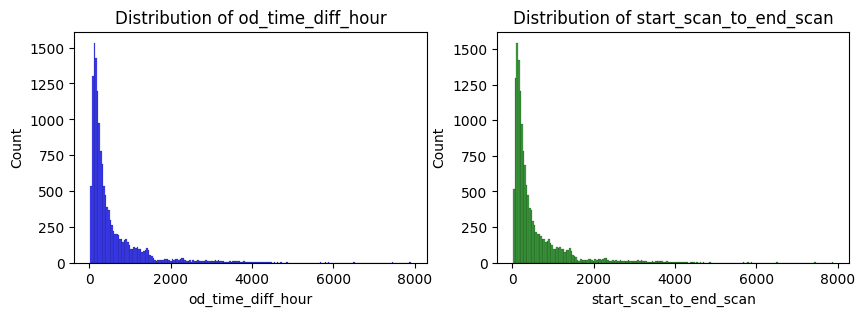

In [ ]:
# H0_sapiro = data is normally distributed | H1_sapiro : Data is not normally Distributed (Right or left skewed)
stat_od, p_od = shapiro(od_time_diff_hour)
stat_start, p_start = shapiro(start_scan_to_end_scan)
print('p_value of od_time_diff_hour : ', p_od, 'p_value of start_scan_to_end_scan : ', p_start)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(od_time_diff_hour, ax=axes[0], color='blue')
axes[0].set_title('Distribution of od_time_diff_hour')

sns.histplot(start_scan_to_end_scan, ax=axes[1], color='green')
axes[1].set_title('Distribution of start_scan_to_end_scan')

plt.show()

Since both the Data are right skewed, we need to use log normal, to convert the Data into a normal distribution

In [ ]:
# H0 : There is no significant between od_time_diff_hour and start_scan_to_end_scan
# H1 : There is a significant between od_time_diff_hour and start_scan_to_end_scan
# alpha : .05

from scipy.stats import ttest_ind
od_time_diff_hour_log = np.log(df['od_time_diff_hour']+1)
start_scan_to_end_scan_log = np.log(df['start_scan_to_end_scan']+1)
t_score, pval = ttest_ind(od_time_diff_hour_log, start_scan_to_end_scan_log )

if pval > .05:
  print('pval :', pval, "We fail to reject Null Hypotheses, no significant between od_time_diff_hour and start_scan_to_end_scan")
else:
  print('pval :', pval, "We reject Null Hypotheses, a significant between od_time_diff_hour and start_scan_to_end_scan")

pval : 0.7799960830061502 We fail to reject Null Hypotheses, no significant between od_time_diff_hour and start_scan_to_end_scan


 Since the pval is high, we fail to reject the null hypothesis.
There is no significant between od_time_diff_hour and start_scan_to_end_scan

<n/>

**Calculate the time taken betweenactual_time and segment_actual_time_sum**

In [ ]:
# H0 : There is no significant between actual_time and segment_actual_time_sum
# H1 : There is a significant between actual_time and segment_actual_time_sum
actual_time = np.log(df['actual_time']+1)
segment_actual_time_sum = np.log(df['segment_actual_time_sum']+1)
z_score, pval = ttest_ind(actual_time, segment_actual_time_sum)
z_score, pval

(0.7665306622670067, 0.4433667334209117)

 Since the pval is high, we fail to reject the null hypothesis.
There is no significant between actual_time & segment_actual_time_sum

<n/>

**Calculate the time taken between segment_actual_time_sum | segment_osrm_time_sum**

In [ ]:
# H0 : There is no significant between segment_actual_time_sum & segment_osrm_time_sum
# H1 : There is a significant between segment_actual_time_sum & segment_osrm_time_sum
segment_actual_time_sum_log = np.log(df['segment_actual_time_sum'])
segment_osrm_time_sum_log = np.log(df['segment_osrm_time_sum'])
z_score, pval = ttest_ind(segment_actual_time_sum_log, segment_osrm_time_sum_log)
z_score, pval

(53.7754792486766, 0.0)

We reject the null Hypothesis, there is a significant difference between segment_actual_time_sum & segment_osrm_time_sum

<n/>

**Calculate the time taken between actual_distance_to_destination','osrm_distance**

In [ ]:
# H0 : There is no significant between actual_distance_to_destination, osrm_distance
# H1 : There is a significant between actual_distance_to_destination, osrm_distance
actual_distance_to_destination = np.log(df['actual_distance_to_destination'])
osrm_distance = np.log(df['osrm_distance'])
z_score, pval = ttest_ind(actual_distance_to_destination, osrm_distance)
z_score, pval

(-16.954326805509588, 3.596433294028001e-64)

We reject the null Hypothesis, there is a significant difference between actual_distance_to_destination, osrm_distance

<n/>

**Calculate the time taken between segment_osrm_time_sum & segment_actual_time_sum**

In [ ]:
# H0 : There is no significant between segment_osrm_time_sum & segment_actual_time_sum
# H1 : There is a significant between segment_osrm_time_sum & segment_actual_time_sum
segment_osrm_time_sum_log = np.log(df['segment_osrm_time_sum']+1)
segment_actual_time_sum_log = np.log(df['segment_actual_time_sum']+1)
z_score, pval = ttest_ind(segment_actual_time_sum_log, segment_osrm_time_sum_log)
z_score, pval

(53.55336538117239, 0.0)

We reject the null Hypothesis, there is a significant difference between segment_osrm_time_sum & segment_actual_time_sum

<n/>

**Segragating state, city, city_place, code from Source name and destiantion name to create new different columns.**

In [ ]:
unique_names = df['destination_name'].unique().tolist()
# ['Doddablpur_ChikaDPP_D (Karnataka)', 'Gurgaon_Bilaspur_HB (Haryana)'....]

In [ ]:
df['destination_name'] = df['destination_name'].str.lower() #lowering all columns
df['source_name'] = df['source_name'].str.lower()

In [ ]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1] # haryana)

    return state[:-1] #removing ')' from ending # haryana

In [ ]:
def place2city(x):
    # We will remove state #"gurgaon_bilaspur_hb (haryana)"
    city = x.split(' (')[0]#"gurgaon_bilaspur_hb

    city = city.split('_')[0]#"gurgaon
    return city

In [ ]:
def place2city_place(x):
    city_place = x.split(' (')[0]
    if '_' in city_place:
        city_place = city_place.split('_')[1]
    else: #since we have places like dehradun (uttarakhand), panipat (haryana)
        city_place = city_place

    return city_place

In [ ]:
def place2code(x):
  code = x.split(' (')[0]
  if len(code.split('_')) >= 3 :
    return code.split('_')[-1]
  return 'None'

In [ ]:
df['source_state'] = df['source_name'].apply(lambda x: place2state(x))
df['source_city']  = df['source_name'].apply(lambda x: place2city(x))
df['source_city_place']  = df['source_name'].apply(lambda x: place2city_place(x))
df['source_code']  = df['source_name'].apply(lambda x: place2code(x))

In [ ]:
df['destination_state'] = df['destination_name'].apply(lambda x: place2state(x))
df['destination_city']  = df['destination_name'].apply(lambda x: place2city(x))
df['destination_city_place']  = df['destination_name'].apply(lambda x: place2city_place(x))
df['destination_code']  = df['destination_name'].apply(lambda x: place2code(x))

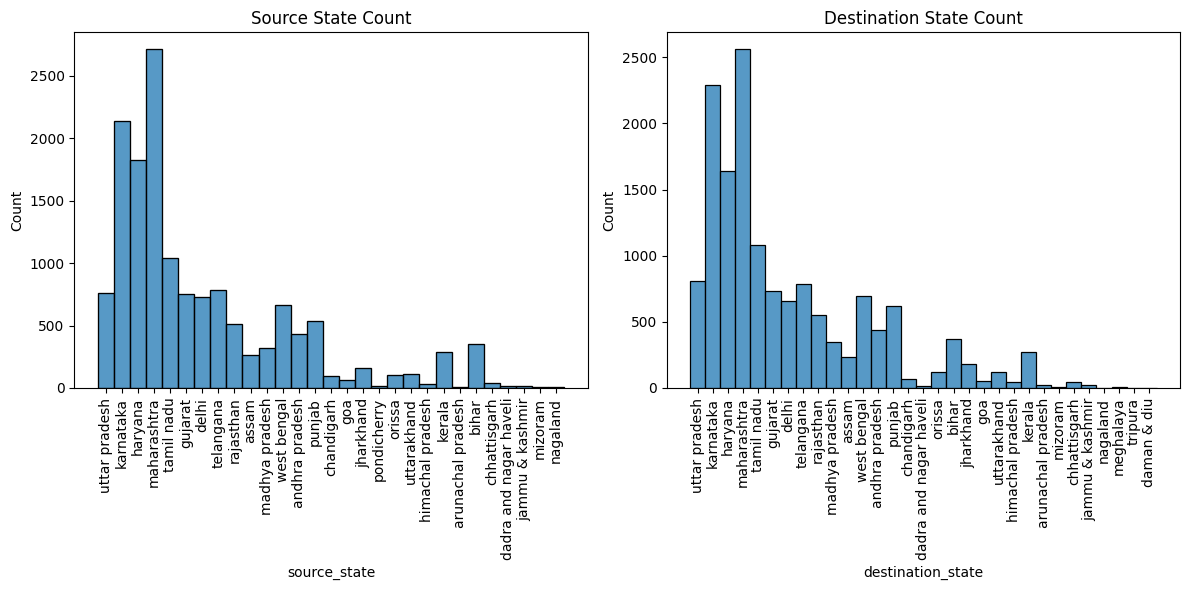

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
sns.histplot(x='source_state', data=df)
plt.title('Source State Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.histplot(x='destination_state', data=df)
plt.title('Destination State Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_week'] = df['trip_creation_time'].dt.isocalendar().week
df['trip_dayofweek'] = df['trip_creation_time'].dt.dayofweek

-- Find outliers in numerical variable

<Axes: >

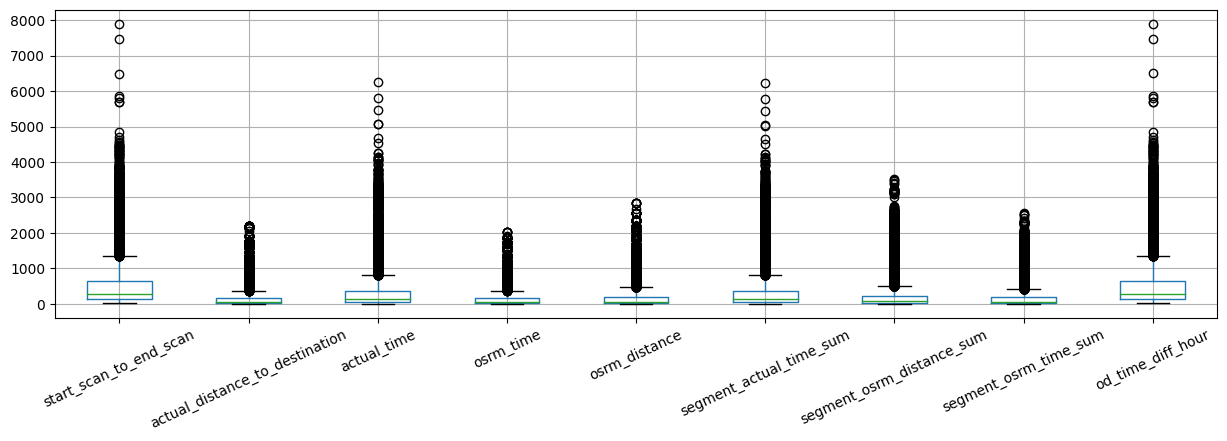

In [ ]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
            'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
            'segment_osrm_distance_sum','segment_osrm_time_sum', 'od_time_diff_hour']
df[num_cols].boxplot(rot=25, figsize=(15,4))

In [ ]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.reset_index(drop=True)

In [ ]:
df.shape

(12722, 32)

Handling Categorical Variables - **One hot encoding**

In [ ]:
cat_col = ['data', 'route_type']
for cat in cat_col:
  display_val  = df[cat].value_counts()
  display(display_val)

,count
data,
training,9096
test,3626


,count
route_type,
Carting,8811
FTL,3911


In [ ]:
df['data'] = df['data'].map({'training':0, 'test':1})
df['route_type'] = df['route_type'].map({'FTL':0, 'Carting':1})

cat_col = ['data', 'route_type']
for cat in cat_col:
  display_val  = df[cat].value_counts()
  display(display_val)

,count
data,
0,2
1,2


,count
route_type,
0,2
1,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[num_cols])
df[num_cols] = scaler.transform(df[num_cols])
df[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548560,0.012304,-0.217700,-0.144192,-0.073754,-0.221346,-0.145190,-0.262545,-0.543338
1,-0.861805,-0.765164,-0.748982,-0.877042,-0.804494,-0.743445,-0.823629,-0.878159,-0.863993
2,1.554097,0.765481,1.034609,0.533349,0.615103,1.045699,0.515206,0.365633,1.552653
3,-0.513320,-0.662146,-0.736333,-0.766423,-0.710852,-0.737078,-0.737252,-0.790214,-0.508144
4,-0.869636,-0.877245,-0.970350,-0.904697,-0.890059,-0.966293,-0.906525,-0.915850,-0.871814
...,...,...,...,...,...,...,...,...,...
12717,-0.247062,-0.201796,-0.597187,-0.227156,-0.203840,-0.597003,-0.349149,-0.300236,-0.246145
12718,-1.018428,-0.788226,-0.989325,-0.918524,-0.844607,-0.985394,-0.863592,-0.940977,-1.020410
12719,0.395091,-0.466601,0.661447,-0.420739,-0.366439,0.670043,0.073145,0.026417,0.395166
12720,0.105339,0.866466,0.547600,1.390646,0.886695,0.523600,1.324745,1.697370,0.105794


In [ ]:
df[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.272200e+04,1.272200e+04,1.272200e+04,1.272200e+04,1.272200e+04,1.272200e+04,1.272200e+04,1.272200e+04,1.272200e+04
mean,-5.333818e-17,-1.720226e-16,6.702180e-18,-6.031962e-17,8.266021e-17,-8.489427e-17,-2.457466e-17,-6.255368e-17,2.094431e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.163304e+00,-8.786062e-01,-1.065222e+00,-1.001488e+00,-9.229546e-01,-1.061799e+00,-9.375974e-01,-1.003795e+00,-1.161186e+00
25%,-7.208450e-01,-7.065911e-01,-7.363329e-01,-7.111138e-01,-7.077340e-01,-7.370784e-01,-7.227691e-01,-7.273966e-01,-7.193069e-01
50%,-3.410354e-01,-4.688827e-01,-4.011188e-01,-3.930843e-01,-4.835442e-01,-3.996241e-01,-4.627085e-01,-4.133077e-01,-3.439055e-01
75%,4.029217e-01,4.076322e-01,4.653780e-01,4.227302e-01,4.420695e-01,4.599295e-01,4.486718e-01,4.912685e-01,4.029868e-01
max,4.052227e+00,4.179977e+00,4.032562e+00,4.114637e+00,4.151886e+00,4.038219e+00,4.131204e+00,4.046755e+00,4.051419e+00


Insights :
- In many cases we can see that there is a significat difference between OSRM and Actual parameters (time and distance)
- If the Actual time/ distance is more, the customer's satisfaction/rating will be reduced.
- If the Actual time/ distance is less, the customer may not purchase, as the waiting time is more even though it could have  been delivered faster, thus affecting the revenue
- Maharashtra, Karnataka, Harayana, TN and UP are the states having most source and destination


Recommeddation:
- The OSRM system need to be improved that will in turn benifit both the customer and the companies experience.
- Ensure good transport and hub facilities specially in the state having high sources and destinations
- In a more granual level we can check which all are the check points within state/city to identify where such difference between the OSRM and actual time/distance is happening in order to fix the problem and get a more realistic figure.
- Since the data is only for 2 month, if we can get more data we can check for seasonality and other factors to give more insights


In [ ]:
# - list_price ranging from 90 to 12000, 50% of it is between 430 to 1550
# - Price ranging (list_price * quantity) from 90 to 12000, 50% of it is between 540 to 2000
# - discount ranging from 5 to 2400, 50% of it is between 44 to 210
# - Selling Price	(Price-discount) ranging from 72 to 21600, 50% of it is between 475 to 1890


In [ ]:
# - Most of the product priced below 1000
# - Most of the discount is below 500
# - The time difference between the actual and the required time does not seems to have any significant difference
# - All delivery happens within 3 days of placing the order

In [ ]:
# - New York has the most sales happening
# - Elentra and Trek are the to brands which have the heighest sales

In [ ]:
# main questions to be answred
# - How to categorise different customers into segments to make marketing stratergies?abs (RFM)
# - understand the difference between the 'actual time taken' and the required time to avoid isues like overcommit and underperformance.
# - top and the bottom performing products/category, same for city
# - total loss after discount given.

In [ ]:
# - Trek and Elentra have the heighest sales (revenue wise upto 75%, and quantity wise upto 50%, among the top 20 brands)
# - Mountain and Road Bike have the heighest sales( revenue wise upto 50%, among the top 20 categories)
# - Cruisers bike & Mountain bike  have the heigest quantity sale (quantity wise upto 50%, among the top 20 categories)
# - Which also means Road Bike are more expensive than Cruisers Bike